In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # regression modeling

In [2]:
# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
apprentice = pd.read_excel(io = file)

# Exploring variables
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [3]:
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


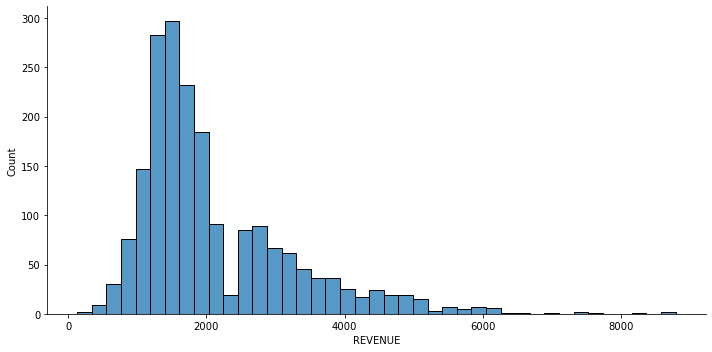

In [4]:
## Exploring revenue distribution ## 

# developing a histogram using DISPLOT
sns.displot(data   = apprentice,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

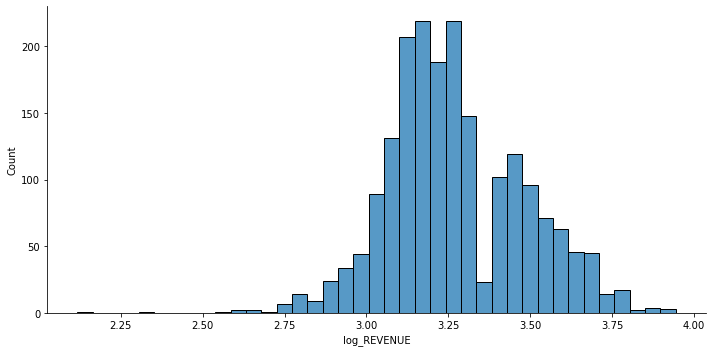

In [5]:
# log transforming Revenue and saving it to the dataset
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# developing a histogram using DISPLOT
sns.displot(data   = apprentice,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

In [6]:
###########################
### Feature engineering ###
###########################

### Adding column: Total Logins (PC_LOGINS + MOBILE LOGINS) 
apprentice['Total_Logins'] = apprentice['PC_LOGINS'] + apprentice['MOBILE_LOGINS']

### log contacts with customer service
apprentice['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice['CONTACTS_W_CUSTOMER_SERVICE'])

## log avg prep vid time 
apprentice['log_AVG_PREP_VID_TIME'] = np.log10(apprentice['AVG_PREP_VID_TIME'])

## log unique meals purchased 
apprentice['log_UNIQUE_MEALS_PURCH'] = np.log10(apprentice['UNIQUE_MEALS_PURCH'])

## log total meals ordered
apprentice['log_TOTAL_MEALS_ORDERED'] = np.log10(apprentice['TOTAL_MEALS_ORDERED'])

## log largest (average) order size
apprentice['log_LARGEST_ORDER_SIZE'] = np.log10(apprentice['LARGEST_ORDER_SIZE'])


## total orders
apprentice['total_orders'] = apprentice['TOTAL_MEALS_ORDERED'] / apprentice['LARGEST_ORDER_SIZE']

## has refirigatorated locker, locker, no locker
apprentice['refrig_locker'] = 0
apprentice['norm_locker'] = 0
apprentice['no_locker'] = 0

## total orders
apprentice['total_orders'] = apprentice['TOTAL_MEALS_ORDERED'] / apprentice['LARGEST_ORDER_SIZE']

### Creating dummy variables for variables with large difference in  distributions
apprentice['above_ten_customer_complaints']   = 0
apprentice['average_over_7'] = 0
apprentice['Viewed_photos'] = 0
apprentice['has_weekly_plan'] = 0
apprentice['used_masterclass'] = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in apprentice.iterrows():
    
    if apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        apprentice.loc[index, 'above_ten_customer_complaints'] = 1
        
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice.loc[index, 'Viewed_photos'] = 1
        
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 0:
        apprentice.loc[index, 'has_weekly_plan'] = 1
        
    if apprentice.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        apprentice['used_masterclass'] = 1
        
    if apprentice.loc[index,'LARGEST_ORDER_SIZE'] > 7:
        apprentice['average_over_7'] = 1
        
    # Locker variables
    if apprentice.loc[index,'REFRIGERATED_LOCKER'] == 1:
        apprentice['refrig_locker'] = 1
        
    elif apprentice.loc[index,'PACKAGE_LOCKER'] == 1:
        apprentice['norm_locker'] = 1
    
    elif apprentice.loc[index,'PACKAGE_LOCKER'] == 0:
        apprentice['no_locker'] = 0


In [7]:
###########################################
### Preparing dataset for OSL Regrssion ###
###########################################

# making a copy of apprentice
apprentice_explanatory = apprentice.copy()


# dropping SalePrice and Order from the explanatory variable set
apprentice_explanatory = apprentice_explanatory.drop([
                                 'REVENUE',
                                 'log_REVENUE',
                                 'NAME',
                                 'EMAIL',
                                 'FIRST_NAME',
                                 'FAMILY_NAME'
                                    ], axis = 1)

# formatting each explanatory variable for statsmodels
for val in apprentice_explanatory:
    print(f""" {val} + """)

 CROSS_SELL_SUCCESS + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 Total_Logins + 
 log_CONTACTS_W_CUSTOMER_SERVICE + 
 log_AVG_PREP_VID_TIME + 
 log_UNIQUE_MEALS_PURCH + 
 log_TOTAL_MEALS_ORDERED + 
 log_LARGEST_ORDER_SIZE + 
 total_orders + 
 refrig_locker + 
 norm_locker + 
 no_locker + 
 above_ten_customer_complaints + 
 average_over_7 + 
 Viewed_photos + 
 has_weekly_plan + 
 used_masterclass + 


In [8]:
#####################################################
### Building model with log_REVENUE               ###
#####################################################

# INSTANTIATING a model type
lm_log = smf.ols(formula = """  log_REVENUE ~ 
                                             CROSS_SELL_SUCCESS + 
                                             TOTAL_MEALS_ORDERED + 
                                             UNIQUE_MEALS_PURCH + 
                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                             MASTER_CLASSES_ATTENDED + 
                                             MEDIAN_MEAL_RATING +  
                                             TOTAL_PHOTOS_VIEWED + 
                                             
                                             log_LARGEST_ORDER_SIZE +
                                             log_AVG_PREP_VID_TIME +
                                             log_TOTAL_MEALS_ORDERED +
                                             log_CONTACTS_W_CUSTOMER_SERVICE +
                                             log_UNIQUE_MEALS_PURCH +
                                             
                                             above_ten_customer_complaints + 
                                             Viewed_photos +
                                             used_masterclass +
                                             average_over_7 +
                                             refrig_locker + 
                                             norm_locker +
                                             total_orders
                                             """,
                                     data = apprentice)

# telling Python to FIT the data to the blueprint
results = lm_log.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     476.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:02:30   Log-Likelihood:                 1765.4
No. Observations:                1946   AIC:                            -3499.
Df Residuals:                    1930   BIC:                            -3410.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [9]:
###################################
### Building and testing models ###
###################################

from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

In [10]:
# preparing explanatory variable data
apprentice_data   = apprentice.drop([
                                'REVENUE',
                                'log_REVENUE',
                                'NAME',
                                'EMAIL',
                                'FIRST_NAME',
                                'FAMILY_NAME'
                                        ],
                               axis = 1)

# preparing response variables
apprentice_target = apprentice.loc[ : , 'REVENUE']
log_housing_target = apprentice.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 38)
y-side: (1459,)


Testing Data
------------
X-side: (487, 38)
y-side: (487,)



In [11]:
# declaring set of x-variables from OLS regression
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
               'TOTAL_PHOTOS_VIEWED','log_LARGEST_ORDER_SIZE','log_TOTAL_MEALS_ORDERED',
               'log_AVG_PREP_VID_TIME','log_CONTACTS_W_CUSTOMER_SERVICE','log_UNIQUE_MEALS_PURCH',
               'above_ten_customer_complaints','Viewed_photos','used_masterclass','average_over_7',
               'refrig_locker','norm_locker','total_orders'] 
                            

In [12]:
### Models in Sci-kit ###

#########################
### OLS - FINAL MODEL ###
#########################

# preparing x-variables from the OLS model
ols_data = apprentice.loc[ : , x_variables]


# preparing response variable
apprentice_target = apprentice.loc[ : , 'REVENUE']
apprentice_log_target = apprentice.loc[ : , 'log_REVENUE']


###############################################
## setting up more than one train-test split 
###############################################
# OLS p-value x-dataset (log Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            apprentice_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_data,     # x-variables
            apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# FULL X-dataset (log Y)
x_train_FULL_log, x_test_FULL_log, y_train_FULL_log, y_test_FULL_log = train_test_split(
            apprentice_data,     # x-variables
            apprentice_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [13]:
#########################
### OLS Regression
#########################

# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# train and test score
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4) # using R-square

# SCORING the results
print('OLS Training Score :', lr_train_score)  # using R-square
print('OLS Testing Score  :', lr_test_score) # using R-square

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7856
OLS Testing Score  : 0.7875
OLS Train-Test Gap : 0.0019


In [14]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)


In [15]:
#########################
### Lasso Regression
#########################

import sklearn.linear_model # linear models

In [16]:
### Lasso with normal revenue ###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.8,
                                         normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square

# SCORING the results
print('Lasso Training Score :', lasso_train_score)
print('Lasso Testing Score  :', lasso_test_score)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.672
Lasso Testing Score  : 0.6841
Lasso Train-Test Gap : 0.0121


In [17]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_data.columns, lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


for val in lasso_model_values:
    lasso_model_lst.append(val)


In [18]:
# dropping coefficients that are equal to zero
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))


('intercept', -54.21)
('CROSS_SELL_SUCCESS', -11.68)
('TOTAL_MEALS_ORDERED', 4.37)
('UNIQUE_MEALS_PURCH', 28.91)
('CONTACTS_W_CUSTOMER_SERVICE', 71.32)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 5.97)
('MASTER_CLASSES_ATTENDED', 138.26)
('MEDIAN_MEAL_RATING', 256.29)
('AVG_CLICKS_PER_VISIT', -20.23)
('TOTAL_PHOTOS_VIEWED', 0.6)
('log_CONTACTS_W_CUSTOMER_SERVICE', 182.12)
('log_UNIQUE_MEALS_PURCH', -1057.32)
('log_TOTAL_MEALS_ORDERED', 150.26)
('total_orders', 0.0)
('norm_locker', 0.0)
('above_ten_customer_complaints', -526.35)
('Viewed_photos', 0.0)
('used_masterclass', 0.0)


In [19]:
#########################
### ARD ###
#########################

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL,y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)

# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)

print('Training Score:', ard_train_score)
print('Testing Score :', ard_test_score)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7155
Testing Score : 0.7347
ARD Train-Test Gap : 0.0192


In [20]:
# zipping each feature name to its coefficient
ard_model_values = zip(apprentice_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

for val in ard_model_values:
    ard_model_lst.append(val)

In [21]:
# dropping coefficients that are equal to zero
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

In [22]:
#########################
###       KNN         ###
#########################

# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [23]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(apprentice_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(apprentice_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.0,1946.0,1946.0,1946.00,1946.0,1946.00,1946.00,1946.0
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,0.0,0.0,0.0,1.00,0.0,1.00,1.00,0.0
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,...,-3.88,-1.33,0.0,0.0,0.0,-0.35,0.0,-0.84,-1.78,0.0
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,...,-0.89,-0.65,0.0,0.0,0.0,-0.35,0.0,-0.84,0.56,0.0
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,...,-0.11,-0.28,0.0,0.0,0.0,-0.35,0.0,-0.84,0.56,0.0
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,...,0.50,0.38,0.0,0.0,0.0,-0.35,0.0,1.19,0.56,0.0
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,...,2.64,6.36,0.0,0.0,0.0,2.83,0.0,1.19,0.56,0.0


In [24]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = apprentice_data.columns


In [25]:
# this is the exact code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            apprentice_target,
            test_size = 0.25,
            random_state = 219)


# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)

# FITTING to the training data
knn_fit = knn_reg.fit(x_train_STAND, y_train_STAND)

# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_STAND)

# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_STAND, y_train_STAND).round(4)
knn_reg_score_test  = knn_reg.score(x_test_STAND, y_test_STAND).round(4)

# SCORING the results
print('KNN Training Score:', knn_reg_score_train)
print('KNN Testing Score :', knn_reg_score_test)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.5203
KNN Train-Test Gap: 0.4797


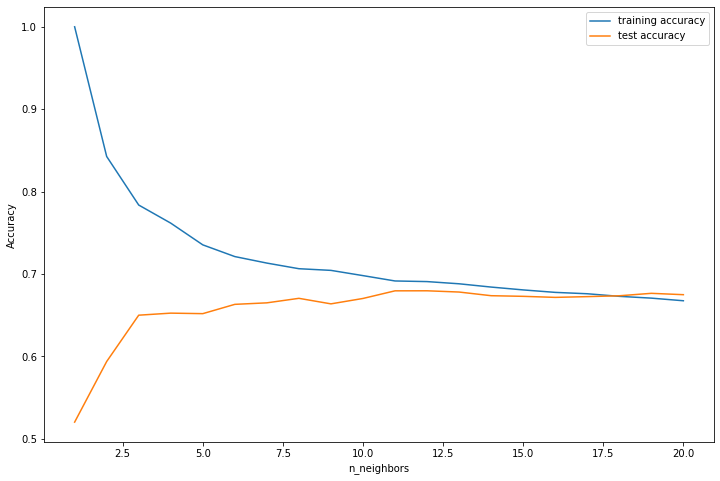

In [26]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [27]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 12


In [28]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# FITTING to the training data
knn_fit = knn_reg.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_FULL)

# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_FULL, y_train_FULL).round(4)
knn_reg_score_test  = knn_reg.score(x_test_FULL, y_test_FULL).round(4)

# SCORING the results
print('KNN Training Score:', knn_reg_score_train)
print('KNN Testing Score :', knn_reg_score_test)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6242
KNN Testing Score : 0.6224
KNN Train-Test Gap: 0.0018


In [32]:
#########################
### comparing results ###
########################

print(f"""
Model      Train Score      Test Score      Train-Test Gap      Model Size
-----      -----------      ----------      --------------      ------------
OLS        {lr_train_score}           {lr_test_score}          {lr_test_gap}              {len(lr_model_lst)}
Lasso      {lasso_train_score}            {lasso_test_score}          {lasso_test_gap}              {len(lasso_model_lst)}
ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap}              {len(ard_model_lst)}
KNN        {knn_reg_score_train}           {knn_reg_score_test}          {knn_reg_test_gap}              NA

Final model: OLS
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD','KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score,
                                  knn_reg_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score,
                                 knn_reg_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap,
                                       knn_reg_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst),'NA'],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst,'NA']}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score      Train-Test Gap      Model Size
-----      -----------      ----------      --------------      ------------
OLS        0.7856           0.7875          0.0019              20
Lasso      0.672            0.6841          0.0121              24
ARD        0.7155           0.7347          0.0192              35
KNN        0.6242           0.6224          0.0018              NA

Final model: OLS

